<a id='classification'></a>
# Classification

Classification is a form of supervised learning in the context of machine learning. The data fed to the algorithm is already labelled, with the important features/attributes divided into distinct categories before it is fed to the algorithm. Classification is a predictive modeling problem in machine learning where a class label is predicted for a given point of input data.

---

### Initial

In [1]:
# Load the python libraries

# Core
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram

# Sklearn
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Linear Support Vector Classification
# Gaussian Naive Bayes
# K Nearest Neighbors
# Random Forest (Bagging)
# Boosting

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


# Utilities
import time
import pickle
import sys
import warnings
import os


In [2]:
# Configuration Variables

data_FOLDER = './data'

SEED = 42

In [3]:
df = pickle.load( open( data_FOLDER+"/pre-processed.pickle", "rb" ) )

In [4]:
# Look at the loaded data

df.head()

,Education_Attainment,Major_Occupation-0,Major_Occupation-1,Major_Occupation-2,Major_Occupation-3,Major_Occupation-4,Age,Household_Income,Months_on_Internet,Community_Membership_Family,...,Who_Pays_for_Access_Self,Who_Pays_for_Access_Work,hasFalsified,isSingle,isTechnical,isMSUser,Adoption,Concerns-0,Concerns-1,Concerns-2
who,,,,,,,,,,,,,,,,,,,,,
93819,0,0,0,0,0,1,41.0,103648.0,20.0,0,...,1,0,0,0,1,0,1,0,1,0
95708,2,0,1,0,0,0,28.0,409.0,1.0,0,...,1,0,1,1,0,1,2,0,0,1
97218,1,1,0,0,0,0,25.0,109012.0,30.0,1,...,1,1,1,0,1,1,1,0,0,1
91627,1,0,0,0,0,1,28.0,58024.0,28.0,0,...,1,0,1,0,1,1,1,0,1,0
49906,3,0,1,0,0,0,17.0,3657.0,27.0,0,...,1,0,1,1,1,1,1,0,0,1


---

## Choose the Classification Model

Used the following diagram to choose the learners to try:

![ML Map](./img/ml_map.png)
    
* Scikitlearn Estimator Cheat Sheet
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html     
 

---

```>50 samples : YES (10108)```

There are more than 50 rows (samples) because there are 10108 rows.

In [5]:
df.shape

(10108, 38)

---

```Predicting a category : YES```

During pre-processing, certain categorical features were converted to numerical features. I'm going to keep these as numerical attributes because it'll make the classification algorithms better.

In [6]:
# These are categorical

TargetsF = ['Education_Attainment', 'Major_Occupation-0', 'Major_Occupation-1', 'Major_Occupation-2', 'Major_Occupation-3', 'Major_Occupation-4']

---

```Do you have labelled data : YES```

For the classifier algorithm, the targets are labels.

In [7]:
Targets = ["Education_Attainment", "Major_Occupation"]

for i in TargetsF:
    print(df[i].unique())

[0 2 1 3]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]


---

```<100K Samples : YES (10108)```

The dataframe contains 10108 rows.

---

## Process to Follow:

These are the steps I'll take in this investigation.

* Representation
* Evaluation
* Optimization
* Testing and Validating

I'm going to try the following classifiers on this problem based on the classification map above.  I expect some of the classifiers to be unsuitable, but I'd like to see how they do as an experiment.  I'm looking forward to the best from the last three on the list.
    
* Linear Support Vector Classification
* Naive Bayes

* K Nearest Neighbors
* SVC
* Ensemble

---

## Representation

### Numeric Fields

In classification, the name should be distinct. I generated three numeric fields as part of the EDA data by "guessing" values.  Although the numeric fields are useful in this format, I've decided that categorical fields will be easier for my classification models. The original divisions were not equally distributed. I'll use the ordinal encoder and the binning feature engineering technique before feeding the features into the models.

* Age
* Household_Income
* Months_on_Internet

```
KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
```

In [8]:
Numeric = ['Age', 'Household_Income', 'Months_on_Internet']

In [9]:
df[Numeric]

,Age,Household_Income,Months_on_Internet
who,,,
93819,41.0,103648.0,20.0
95708,28.0,409.0,1.0
97218,25.0,109012.0,30.0
91627,28.0,58024.0,28.0
49906,17.0,3657.0,27.0
...,...,...,...
97004,19.0,106524.0,36.0
96381,39.0,23241.0,69.0
94762,51.0,24654.0,33.0


In [10]:
%%time

binMe = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
binMe.fit(df[Numeric])
Xt = binMe.transform(df[Numeric])
Xt = Xt.transpose()

df['Age'] = Xt[0]
df['Household_Income'] = Xt[1]
df['Months_on_Internet'] = Xt[2]

df[Numeric]

CPU times: user 13.1 ms, sys: 897 µs, total: 14 ms
Wall time: 14.7 ms


,Age,Household_Income,Months_on_Internet
who,,,
93819,2.0,5.0,1.0
95708,1.0,0.0,0.0
97218,1.0,5.0,1.0
91627,1.0,2.0,1.0
49906,0.0,0.0,1.0
...,...,...,...
97004,1.0,5.0,2.0
96381,2.0,1.0,4.0
94762,3.0,1.0,2.0


---

### Binary Fields

Certain binary fields are encoded with True or False. Many machine learning algorithms can't deal with boolean data directly. Both input and output variables must be numeric. These would have to be converted.

---

### Categorical Targets

Initially for this analysis, I will not convert the categorical target fields ("Education Attainment," "Major Occupation") into categorical. This converts the fields to strings, which are incompatible with classification algorithms.

---

## Evaluation

### Fit Model and Predict

For an unbiased evaluation of prediction results, you must split your dataset. In most cases, dividing the dataset into three subsets at random is sufficient. The training set is used to prepare your model for modeling. During hyperparameter tuning, the validation collection is used for unbiased model evaluation. The test set is needed for a fair assessment of the final model.

In [11]:
Features = [x for x in df.columns if x not in TargetsF]

y = df[TargetsF].values
X = df[Features].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=SEED)

---

### First Pass Through a Pipeline of Various Classifiers

The data is passed through the classifiers using a sequence of pipelines in the code below. This is for a preliminary assessment of the classifiers' performance. At this time, the hyperparameters have not been optimized; they were chosen based on examples in documentation.

**Note:** We need the multioutclassifier because we are forecasting four factors in one sweep: educational attainment, major occupation (multivalue column). It's possible that the two targets are associated and should not be predicted independently. It would be fair to believe that household income is linked to educational attainment because higher levels of education should result in higher earnings. This was not found in the EDA due to the categorical nature of these fields, but it is logical deduction.

**Note:** The Gaussian Naive Bayes algorithm is a type of NB algorithm that is special. When the features have continuous values, it's used explicitly. It is often assumed that all of the features have a gaussian distribution, or a regular distribution.  It proved more robust with the data than the other variants.  Later on in the study, I standardize the data. Surprisingly, it worked reasonably well in the first attempt.

In [13]:
%%time

lsvc = LinearSVC(random_state=0, tol=1e-5)
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators=10)
boost = AdaBoostClassifier(n_estimators=100)

classifiers = [lsvc, gnb, knn, rfc, boost]
pipelines = []

for classifier in classifiers:
    pipelines.append(Pipeline([('clss',MultiOutputClassifier(classifier, n_jobs=-1))]))

# Dictionary of pipelines and classifier types
pipe_dict = {0: 'Linear SVC', 1: 'Guassian NB', 2: 'K Neighbors', 3: 'Random Forest', 4: 'Ada Boost'}
    

for i, pipe in enumerate(pipelines):
    scores = cross_val_score(pipe, X=X_train, y=y_train, cv=20)
    
    print(pipe_dict[i])
    print('\nCV accuracy scores: %s' % scores)
    print(f'\nCV estimate of accuracy is: {scores.mean():.2%} +/- {scores.std()*2/len(scores):.2%}')
    print('\n---\n')

Linear SVC

CV accuracy scores: [0.10837438 0.12315271 0.14285714 0.1980198  0.17326733 0.14851485
 0.12376238 0.13366337 0.15841584 0.16336634 0.19306931 0.13366337
 0.16336634 0.15841584 0.16336634 0.15346535 0.22277228 0.10891089
 0.14356436 0.12376238]

CV estimate of accuracy is: 15.19% +/- 0.29%

---

Guassian NB

CV accuracy scores: [0.06403941 0.05418719 0.10344828 0.12376238 0.08415842 0.0990099
 0.06435644 0.10891089 0.07920792 0.0990099  0.08910891 0.07920792
 0.07425743 0.06930693 0.07425743 0.08910891 0.1039604  0.06930693
 0.06435644 0.04455446]

CV estimate of accuracy is: 8.19% +/- 0.20%

---

K Neighbors

CV accuracy scores: [0.12807882 0.10344828 0.14285714 0.16336634 0.14851485 0.14851485
 0.12376238 0.12871287 0.16831683 0.08415842 0.13861386 0.14356436
 0.10891089 0.13366337 0.14356436 0.12376238 0.11881188 0.08415842
 0.14356436 0.11881188]

CV estimate of accuracy is: 12.99% +/- 0.22%

---

Random Forest

CV accuracy scores: [0.10344828 0.09852217 0.14778325 0.16

---

### Multiclass-Multioutput Classification

From this point on, I'm having trouble using MultiOutputClassifier in my pipeline. It appears that the classifier won't work well in conjunction with the other steps I need to complete. With many hours of work, experimentation, and research, I attempted to resolve the problem.

The scikit documentation describe the classification activity that labels each sample with a set of non-binary properties is known as multiclass-multioutput classification (also known as multitask classification). The number of properties and groups per property are also greater than two. As a result, a single estimator can perform several joint classification tasks.  The documentation has a warning: "**Warning:** At present, no metric in sklearn.metrics supports the multiclass-multioutput classification task."

I might use a variety of tactics to get around this, such as treating the targets across various pipelines. Instead, I consider the assignment's task to be testing the performance of the chosen classifiers rather than achieving a prediction.  As a result, I've decided to take the next step. I placed the two targets together in a new target column. The integer value in the target column represents the other two groups that the observation belongs to. The value of the original two target values could be discovered by reverse engineering the integer.

Is this going to work? Can the classification alogrithms result in the creation of new classes, i.e. integers between the existing ones? That is, it has viewed the classes as numbers rather than seeing them as category numbers. At the end of this, I'll take a look and report back on my conclusions.

In [14]:
%%time

# Education attainment as ordinality
# Major Occupation does not have ordinality

# Convert the two target columns into an integer that retains the information
# of the orginal two columns

df['Major_Occupation-0'].astype('int32').dtypes
df['Major_Occupation-1'].astype('int32').dtypes
df['Major_Occupation-2'].astype('int32').dtypes
df['Major_Occupation-3'].astype('int32').dtypes
df['Major_Occupation-4'].astype('int32').dtypes


def target (row):
    MO = ""
    if (row['Major_Occupation-0']==1):
        MO=str(row['Education_Attainment']+1).strip(".0")+'0'
    if (row['Major_Occupation-1']==1):
        MO=str(row['Education_Attainment']+1).strip(".0")+'1'
    if (row['Major_Occupation-2']==1):
        MO=str(row['Education_Attainment']+1).strip(".0")+'2'
    if (row['Major_Occupation-3']==1):
        MO=str(row['Education_Attainment']+1).strip(".0")+'3'
    if (row['Major_Occupation-4']==1):
        MO=str(row['Education_Attainment']+1).strip(".0")+'4'
    return MO

df['TARGET'] = df.apply (lambda row: target(row), axis=1)

# Assigns an integer as to a category for each class

# Turn that into a real
df['TARGET'].astype('int32').dtypes

# Take a look....
df['TARGET']

# It retained its value

CPU times: user 715 ms, sys: 22.7 ms, total: 737 ms
Wall time: 1.13 s


who
93819    14
95708    31
97218    20
91627    24
49906    41
         ..
97004    41
96381    30
94762    42
97062    20
92223    13
Name: TARGET, Length: 10108, dtype: object

In [15]:
df.TARGET.value_counts()

33    920
31    905
20    831
43    788
24    747
14    651
30    600
41    572
34    473
23    470
11    462
21    400
10    398
32    393
22    369
44    292
12    258
40    256
42    162
13    161
Name: TARGET, dtype: int64

In [16]:
# Drop the orginal target columns
df.drop(TargetsF, inplace=True, axis=1)

In [17]:
# Can I reverse engineer the new TARGET to the old columns?

# Yes this will not be difficult

In [18]:
#Features = [x for x in df.columns if x not in TargetsF]

y = df['TARGET'].values
X = df[Features].values

---

### Rerun the Previous Pipelines (without the Multi Output Classifier)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=SEED)

In [20]:
%%time

lsvc = LinearSVC(random_state=0, tol=1e-5)
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators=10)
boost = AdaBoostClassifier(n_estimators=100)

classifiers = [lsvc, gnb, knn, rfc, boost]
pipelines = []

for classifier in classifiers:
    #pipelines.append(Pipeline([('clss',MultiOutputClassifier(classifier, n_jobs=-1))]))
    pipelines.append(Pipeline([('clss',classifier)]))

# Dictionary of pipelines and classifier types
pipe_dict = {0: 'Linear SVC', 1: 'Guassian NB', 2: 'K Neighbors', 3: 'Random Forest', 4: 'Ada Boost'}
    

for i, pipe in enumerate(pipelines):
    scores = cross_val_score(pipe, X=X_train, y=y_train, cv=20)
    
    print(pipe_dict[i])
    print('\nCV accuracy scores: %s' % scores)
    print(f'\nCV estimate of accuracy is: {scores.mean():.2%} +/- {scores.std()*2/len(scores):.2%}')
    print('\n---\n')

/Users/wazby/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/wazby/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/wazby/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/wazby/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/wazby/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Lib

Linear SVC

CV accuracy scores: [0.2364532  0.24630542 0.27586207 0.28712871 0.25742574 0.23762376
 0.27227723 0.22772277 0.25742574 0.27227723 0.30693069 0.26237624
 0.25247525 0.24752475 0.21782178 0.28712871 0.24752475 0.23762376
 0.24752475 0.26237624]

CV estimate of accuracy is: 25.70% +/- 0.21%

---

Guassian NB

CV accuracy scores: [0.06896552 0.05418719 0.09852217 0.08415842 0.06930693 0.07920792
 0.06435644 0.07425743 0.05445545 0.11386139 0.05445545 0.05445545
 0.07920792 0.05445545 0.0990099  0.06930693 0.08415842 0.09405941
 0.05445545 0.05940594]

CV estimate of accuracy is: 7.32% +/- 0.18%

---

K Neighbors

CV accuracy scores: [0.16256158 0.15270936 0.17241379 0.21287129 0.17821782 0.13861386
 0.14356436 0.18316832 0.13366337 0.11881188 0.12871287 0.11881188
 0.14356436 0.12376238 0.12871287 0.08910891 0.10891089 0.13861386
 0.16831683 0.15346535]

CV estimate of accuracy is: 14.49% +/- 0.28%

---

Random Forest

CV accuracy scores: [0.18719212 0.18719212 0.2364532  0.2

**Where are we:**
I merged the target columns into a single target column. At this time, no hyperparameter tuning has been done. I'm just using the defaults found in documentation and class notes as examples.

**Comparison:**
The accuracy performance between first run and second run:
    
| Classifier    | Accuracy 1    | Accuracy 2  |
| ------------- |:-------------:| -----------:|
| Linear SVC    | 15.19         | 25.7        |
| Guassian NB   | 8.19          | 7.32        |
| K Neighbors   | 12.99         | 14.49       |
| Random Forest | 13.46         | 19.44       |
| Ada Boost     | 16.7          | 15.16       |


**Observations:**
* Warnings of convergence began to emerge.
* The accuracy of Linear SVC increased dramatically from 15 to 25%. However, it appears LSVC is the classifier issuing the alerts.
* GNB's accuracy decreased by almost 2%
* KNN's accuracy increased slightly 
* Random Forest's accuracy increased by around 5%
* Ada Boost decreased by about 1%.

---

## Optimisation

### Hyperparameter Tuning with GridSearchCV

In almost every Machine Learning project, we train various models on the dataset and then choose the one that performs the best. However, since we cannot be certain that this model is the best for the problem at hand, there is almost always space for improvement. As a result, our goal is to improve the model in whatever way we can.  The hyperparameters of these models are an essential factor in their performance; once we set acceptable values for these hyperparameters, the performance of a model will dramatically improve. In this section, I'll use GridSearchCV to find the best values for a model's hyperparameters.

Hyperparameter tuning is the method of determining the best values for a model's hyperparameters. There is no way to know ahead of time what the best values for hyperparameters are, so we should try all possible values to find the best ones. Since manually tuning hyperparameters will take a significant amount of time and resources, we use GridSearchCV to automate the process.

**Note:** GridSearchCV took a very long time to process.  I have commented out that section of code below and rather use RandomisedSearchCV method.  The results were very similar.

#### Make a List of All Hyperparams

I was getting errors regarding invalid parameter errors like this : "ValueError: Invalid parameter dual for estimator Pipeline..."  Decided to evalute the names of the parameters for the param_grid list.

In [21]:
print(LinearSVC().get_params())
print("---\n")

print(GaussianNB().get_params())
print("---\n")

print(KNeighborsClassifier().get_params())
print("---\n")

print(RandomForestClassifier().get_params())
print("---\n")

print(AdaBoostClassifier().get_params())
print("---\n")

{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}
---

{'priors': None, 'var_smoothing': 1e-09}
---

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
---

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
---

{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}
---



#### Define the Hyperparameters to Test

#### Note:

When I tried to test the hyperparameters for LinearSVC, I ran into some issues. I'm guessing the algorithm can't handle the kind of data it's being served.  The error messages I received included: 

* Estimator fit failed. The score on this train-test
* Unsupported set of arguments: The combination of penalty='l2' and loss='squared_hinge' are not supported when dual=False, Parameters: penalty='l2', loss='squared_hinge', dual='False'

The task requires the use of three different classifiers. Since I have five, I decided to leave LinearSVC out of this hyperparameter test, keeping in mind the task at hand and the time constraints. The code below has been modified to reflect this decision.

**Note:** 
I had the best results with Linear SVC up until this stage, with an accuracy of around 25%. This is something to keep in mind in the end. If the other classifiers don't change dramatically, it may be worth trying to get Linear SVC to function.

In [22]:
# define the list
param_grid = []
param_grid.append(0)
param_grid.append(1)
param_grid.append(2)
param_grid.append(3)


#LinearSVC 
#param_grid[0] = { 
#        'clf__penalty': ['l1', 'l2'],
#        'clf__loss' : ['hinge', 'squared_hinge'],
#        'clf__dual' : ['True','False'],
#    }


# Gaussian NB
param_grid[0] = [
    {  
        'clf__var_smoothing': np.logspace(0,-9, num=100)
    }
]

# KNN
param_grid[1] = [
    {   
        'clf__n_neighbors': range(1, 21, 2),
        'clf__weights': ['uniform', 'distance'],
        'clf__metric': ['euclidean', 'manhattan', 'minkowski']
    }
]

# Random Forest
param_grid[2] = [
    {    
        'clf__n_estimators' : [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
        'clf__max_features' : ['auto', 'sqrt']  
    }
]

# Ada Boost
param_grid[3] = [
    {
        'clf__n_estimators' : [10, 50, 100, 500, 1000, 5000]  
    }
]

#### Define the Pipelines

In [23]:
#lscv = Pipeline([
#    ('scl', StandardScaler()),
#    ('clf', LinearSVC())
#    ])

In [24]:
gnb = Pipeline([
    ('scl', StandardScaler()),
    ('clf', GaussianNB())
    ])

In [25]:
knn = Pipeline([
    ('scl', StandardScaler()),
    ('clf', KNeighborsClassifier())
    ])

In [26]:
rfc = Pipeline([
    ('scl', StandardScaler()),
    ('clf', RandomForestClassifier())
    ])

In [27]:
boost = Pipeline([
    ('scl', StandardScaler()),
    ('clf', AdaBoostClassifier())
    ])

#### Build Lists for Iteration

In [28]:
# Rebuild piplelines list
#pipelines = [lscv, gnb, knn, rfc, boost]
#
#pipe_dict = {0: 'Linear SVC', 1: 'Guassian NB', 2: 'K Neighbors', 3: 'Random Forest', 4: 'Ada Boost'}

In [29]:
# Rebuild piplelines list
pipelines = [gnb, knn, rfc, boost]

pipe_dict = {0: 'Guassian NB', 1: 'K Neighbors', 2: 'Random Forest', 3: 'Ada Boost'}

#### Run the Pipelines with Hyperparameters

In [30]:
##%%time

## As noted above:  The hyperparameter search took an immense time to process and I have chosen rather to use the 
## RandomizedSearchCV method

#for i, pipeline in enumerate(pipelines):
    
    
#    print("----------------------------")
#    print(pipe_dict[i])
#    print(param_grid[i])

#    gs = GridSearchCV(estimator=pipeline, return_train_score=True, param_grid=param_grid[i], scoring='accuracy')
    
#    gs = gs.fit(X_train, y_train)
#    print('\n')
#    print('Results:')
#    print(gs.best_score_)
#    print(gs.best_params_)
    
    # summarize results
#    print("\n")
#    means = gs.cv_results_['mean_test_score']
#    stds = gs.cv_results_['std_test_score']
#    params = grid_result.cv_results_['params']
    
#    for mean, stdev, param in zip(means, stds, params):
#        print("%f (%f) with: %r" % (mean, stdev, param))

#    print("\n\n")

#### RandomizedSearchCV

The GridSearch above took a very long time to execute.  I run RanomizedSearchCV below to see if I get quicker results.

In GridSearchCV (above), we identify the combinations and train the model, while in RandomizedSearchCV, the model chooses the combinations at random. Both are very useful methods for increasing the model's generalizability by tuning the parameters.

**NOTE**  The code block below takes a very long time to run.  I have changed the code so that it will not run unless run is set to True below.

In [31]:
run = True

In [32]:
%%time

if run:

    for i, pipeline in enumerate(pipelines):


        print("----------------------------")
        print(pipe_dict[i])
        print(param_grid[i])

        rs = RandomizedSearchCV(estimator=pipeline, return_train_score=True, param_distributions=param_grid[i], scoring='accuracy')

        rs = rs.fit(X_train, y_train)
        print('\n')
        print('Results:')
        print(rs.best_score_)
        print(rs.best_params_)

        # summarize results
        print("\n")
        means = rs.cv_results_['mean_test_score']
        stds = rs.cv_results_['std_test_score']
        params = rs.cv_results_['params']

        print(params)

        for mean, stdev, param in zip(means, stds, params):
            print("%f (%f) with: %r" % (mean, stdev, param))

        print("\n\n")

        #df_rs = pd.DataFrame(np.transpose([
        #rs.cv_results_["mean_test_score"],
        #rs.cv_results_["param_clf__C"].data,
        #rs.cv_results_["param_clf__gamma"].data]),
        #columns=['score', 'C', ' gamma'])


        #df_rs.plot(subplots=True,figsize=(12, 8))
        #plt.savefig("rs__example_1.pdf", bbox_inches="tight")
        #plt.show()


----------------------------
Guassian NB
[{'clf__var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
       1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
       6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
       2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
       1.23284674e-03, 1.00000000e-03, 8.11130831e-04, 6.57933225e-04,
       5.33669923e-04, 4.32876128e-04, 3.51119173e-04, 2.84803587e-04,
       2.31012970e-04, 1.87381742e-04, 1.51991108e-04, 1.23284674e-04,
       1.00000000e-04, 8.11130831e-05, 6.57933225e-05, 5.33669923e-05,
       4.32876128e-05, 3.51119173e-05, 2.84803587e-05, 2.31012970e-05,
       1.873

/Users/wazby/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(




Results:
0.25154389357353535
{'clf__n_estimators': 10}


[{'clf__n_estimators': 10}, {'clf__n_estimators': 50}, {'clf__n_estimators': 100}, {'clf__n_estimators': 500}, {'clf__n_estimators': 1000}, {'clf__n_estimators': 5000}]
0.251544 (0.006540) with: {'clf__n_estimators': 10}
0.178082 (0.012316) with: {'clf__n_estimators': 50}
0.148400 (0.016295) with: {'clf__n_estimators': 100}
0.106849 (0.009280) with: {'clf__n_estimators': 500}
0.101653 (0.009772) with: {'clf__n_estimators': 1000}
0.098190 (0.013366) with: {'clf__n_estimators': 5000}



CPU times: user 19min 41s, sys: 1min 3s, total: 20min 45s
Wall time: 26min 22s


**Where are we:**
RandomizedSearchCV was used to choose hyperparameters for the classifiers and to calculate the accuracy scores. Because it was giving convergence alerts, I dropped LinearSVC, which had previously had the highest accuracy ranking.

**Comparison:**
The accuracy performance percentage between first, second and third run:
    
| Classifier    | Accuracy 1    | Accuracy 2  | Accuaracy 3  |
| ------------- |:-------------:| -----------:|:------------:|
| Linear SVC    | 15.19         | 25.7        |-             |
| Guassian NB   | 8.19          | 7.32        |18.3          |
| K Neighbors   | 13.7          | 14.86       |21.1          |
| Random Forest | 13.18         | 18.5        |22.3          |
| Ada Boost     | 16.7          | 15.16       |25.1          |


**Observations:**
* Warnings were given by RandomForest. It is basically saying that in order to get the most accurate results the GridSearch method should be used.  I have already opted not to use GridSearch as it was very time and processor heavy.
* UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
    

* All the Classifiers had a dramatic improvement.
* GNB up by 12%
* KNN up by about 7%
* RandomForest up by about 4%
* Ada Boost up by about 10%

As a result, the Hyperparameter tuning has significantly improved. It's worth noting that Ada Boost is essentially claiming that if it's used with the GridSeachCV, it'll get better results; this is may be true with all the classifiers.  I test GridSearchCV below...

**NOTE**  The code block below takes a very long time to run.  I have changed the code so that it will not run unless run is set to True below.

In [33]:
run = True

In [34]:
%%time

if run:

    for i, pipeline in enumerate(pipelines):


        print("----------------------------")
        print(pipe_dict[i])
        print(param_grid[i])

        gs = GridSearchCV(estimator=pipeline, return_train_score=True, param_grid=param_grid[i], scoring='accuracy')

        gs = gs.fit(X_train, y_train)
        print('\n')
        print('Results:')
        print(gs.best_score_)
        print(gs.best_params_)

        # summarize results
        print("\n")
        means = gs.cv_results_['mean_test_score']
        stds = gs.cv_results_['std_test_score']
        params = gs.cv_results_['params']

        for mean, stdev, param in zip(means, stds, params):
            print("%f (%f) with: %r" % (mean, stdev, param))

        print("\n\n")

----------------------------
Guassian NB
[{'clf__var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
       1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
       6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
       2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
       1.23284674e-03, 1.00000000e-03, 8.11130831e-04, 6.57933225e-04,
       5.33669923e-04, 4.32876128e-04, 3.51119173e-04, 2.84803587e-04,
       2.31012970e-04, 1.87381742e-04, 1.51991108e-04, 1.23284674e-04,
       1.00000000e-04, 8.11130831e-05, 6.57933225e-05, 5.33669923e-05,
       4.32876128e-05, 3.51119173e-05, 2.84803587e-05, 2.31012970e-05,
       1.873



Results:
0.21493715502576216
{'clf__metric': 'manhattan', 'clf__n_neighbors': 17, 'clf__weights': 'distance'}


0.149394 (0.013413) with: {'clf__metric': 'euclidean', 'clf__n_neighbors': 1, 'clf__weights': 'uniform'}
0.149394 (0.013413) with: {'clf__metric': 'euclidean', 'clf__n_neighbors': 1, 'clf__weights': 'distance'}
0.148399 (0.011661) with: {'clf__metric': 'euclidean', 'clf__n_neighbors': 3, 'clf__weights': 'uniform'}
0.158790 (0.011307) with: {'clf__metric': 'euclidean', 'clf__n_neighbors': 3, 'clf__weights': 'distance'}
0.172396 (0.009805) with: {'clf__metric': 'euclidean', 'clf__n_neighbors': 5, 'clf__weights': 'uniform'}
0.182286 (0.014271) with: {'clf__metric': 'euclidean', 'clf__n_neighbors': 5, 'clf__weights': 'distance'}
0.186742 (0.004809) with: {'clf__metric': 'euclidean', 'clf__n_neighbors': 7, 'clf__weights': 'uniform'}
0.192430 (0.007203) with: {'clf__metric': 'euclidean', 'clf__n_neighbors': 7, 'clf__weights': 'distance'}
0.191438 (0.008271) with: {'clf__metric': 



Results:
0.25154389357353535
{'clf__n_estimators': 10}


0.251544 (0.006540) with: {'clf__n_estimators': 10}
0.178082 (0.012316) with: {'clf__n_estimators': 50}
0.148400 (0.016295) with: {'clf__n_estimators': 100}
0.106849 (0.009280) with: {'clf__n_estimators': 500}
0.101653 (0.009772) with: {'clf__n_estimators': 1000}
0.098190 (0.013366) with: {'clf__n_estimators': 5000}



CPU times: user 31min 53s, sys: 2min 15s, total: 34min 8s
Wall time: 38min 59s


**Where are we:**
Because Ada Boost was giving a warning in the previous run.  I decided to run hyperparameter tuning through GridSearchCV to see the difference between RandomSearchCv and GridSearchCV.

**Comparison:**
The accuracy performance percentage between first, second, third and fourth run.  For this review, I went back to decimal percentages:
    
| Classifier    | Accuracy 1    | Accuracy 2  | Accuaracy 3  | Accuracy 4  |
| ------------- |:-------------:| -----------:|:------------:|:------------|
| Linear SVC    | 0.1519         | 0.257        |-             |-            |
| Guassian NB   | 0.082          | 0.732        |0.18302696153422512            |0.20083436341161928           |
| K Neighbors   | 0.129          | 0.1449       |0.21197114148992155            |0.21493715502576216           |
| Random Forest | 0.1346         | 0.1944        |0.22384406858485603           |0.2235974617239227           |
| Ada Boost     | 0.167          | 0.1516       |0.25154389357353535            |0.25154389357353535           |


**Observations:**
* No warnings were received this time
* GNB improved by about 7%
* There was no improvement for KNN or Ada Boost
* Tiny improvements in accuracy were seen for Random Forest
* GridSearch takes a longer time to run than RadomSearch
* The time it took to run these two methods was 47min for GridSearch and 30min for RandomSearch.

As a result, with GNB, the accuracy benefit from Hyperparameter tuning with GridSearchCV was around 7%. A few new hyperparameters were discovered. These are included in the sections that follow. I think it is fair to note that the accuracy disparity between RandomSearchCV and GridSearchCV does not justify the GridSearchCV's longer processing time.  Also note that the highest accuarcy is still Linear SVC at 0.257 which is higher then the optimised ensemble methods.

#### Hyperparameters From RandomizedSearchCV and GridSearchCV

The GridSearchCV hyperparameters in the code block below override the RandomisedSearchCV hyperparameters. Even though the accuracy gain is minor, it is preferable to use the GridSearchCV hyperparameters if they differ from the RandomisedSearchCV hyperparameters and the accuracy was higher.

**Note:**

* I had trouble getting these parameter lists into the cross validation functions.
* I assume either my syntax is incorrect or the cross validation functions are not intended to operate in this manner.
* As a consequence, in the pipeline descriptions below, I've "hard coded" my params.
* This accomplishes what I wanted, but not in the manner in which I desired.
* I retained the commented out code block incase I can fix this later.  
* It also is a record of where my parameters came from.

In [35]:
# define the list
#param_grid = []
#param_grid.append(0)
#param_grid.append(1)
#param_grid.append(2)
#param_grid.append(3)


#LinearSVC 
#param_grid[0] = { 
#        'clf__penalty': ['l1', 'l2'],
#        'clf__loss' : ['hinge', 'squared_hinge'],
#        'clf__dual' : ['True','False'],
#    }

# Guassian NB
#params[0] = {'clf__var_smoothing': 0.01519911082952933} #RandomSearch
#params[0] = [
#                {
#                    'clf__var_smoothing' = 1.0) #GridSearch

# K Neighbors
#params[1] = {'clf__weights': 'distance', 'clf__n_neighbors': 17, 'clf__metric': 'manhattan'} #RandomSearch
#params[1] = {'clf__metric': 'manhattan', 'clf__n_neighbors': 17, 'clf__weights': 'distance'} #GridSearch #same

# Random Forest
# params[2] ={'clf__n_estimators': 1800, 'clf__max_features': 'sqrt'} # RandomSearch
#params[2] = {'clf__max_features': 'sqrt', 'clf__n_estimators': 800} #GridSearch

# Ada Boost
#params[3] = {'clf__estimators': 10} #RandomSearch
#params[3] = {'clf__estimators': 10} #GridSearch #same

## Evaluate

#### Test / Evaluate Model

In [36]:
lscv = Pipeline([
    ('scl', StandardScaler()),
    ('clf', LinearSVC())
    ])

In [37]:
gnb = Pipeline([
    ('scl', StandardScaler()),
    ('clf', GaussianNB(var_smoothing = 1.0))
    ])

In [38]:
knn = Pipeline([
    ('scl', StandardScaler()),
    ('clf', KNeighborsClassifier(weights='distance', n_neighbors=17, metric='manhattan'))
    ])

In [39]:
rfc = Pipeline([
    ('scl', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators=800, max_features='sqrt'))
    ])

In [40]:
boost = Pipeline([
    ('scl', StandardScaler()),
    ('clf', AdaBoostClassifier(n_estimators=10))
    ])

In [42]:
%%time

# Notes on CV parameters:
#
# LSCV was reintroduced.
# cv=20 should be increased. [On LSCV, try to get rid of errors]
# n jobs=-1 [Trying to use both cores to speed up processing]
# Precision on accuracy reading has been increased to 8.


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=SEED)

pipelines = [lscv, gnb, knn, rfc, boost]

# Dictionary of pipelines and classifier types
pipe_dict = {0: 'Linear SVC', 1: 'Guassian NB', 2: 'K Neighbors', 3: 'Random Forest', 4: 'Ada Boost'}
    
for i, pipeline in enumerate(pipelines):
    
    print(pipe_dict[i])
    print("----------------")
    
    scores = cross_val_score(pipeline, X=X_train, y=y_train, cv=20, n_jobs=-1)
    
    print('CV accuracy scores: %s' % scores)
    print("\n--- Accuracy ---")
    print('CV accuracy: %.8f +/− %.3f' % (np.mean(scores),np.std(scores)))
    print("\n")

Linear SVC
----------------
CV accuracy scores: [0.25328947 0.24671053 0.25328947 0.23026316 0.2310231  0.26732673
 0.21782178 0.25412541 0.27062706 0.25082508 0.2310231  0.26072607
 0.27062706 0.27722772 0.24752475 0.26072607 0.25742574 0.26732673
 0.24752475 0.24422442]

--- Accuracy ---
CV accuracy: 0.25198291 +/− 0.015


Guassian NB
----------------
CV accuracy scores: [0.25328947 0.21381579 0.21052632 0.18092105 0.15841584 0.1980198
 0.1980198  0.20462046 0.20792079 0.20462046 0.17821782 0.20132013
 0.24752475 0.20462046 0.18811881 0.1650165  0.19141914 0.21782178
 0.16171617 0.21452145]

--- Accuracy ---
CV accuracy: 0.20002334 +/− 0.024


K Neighbors
----------------
CV accuracy scores: [0.19078947 0.20065789 0.21381579 0.17434211 0.19471947 0.20792079
 0.1980198  0.2310231  0.22772277 0.21452145 0.19471947 0.20792079
 0.21122112 0.21452145 0.17491749 0.21452145 0.1980198  0.23432343
 0.20792079 0.23762376]

--- Accuracy ---
CV accuracy: 0.20746211 +/− 0.017


Random Forest
----

| Classifier    | Accuracy 1    | Accuracy 2  | Accuaracy 3  | Accuracy 4  | Accuracy 5  | 
| ------------- |:-------------:| -----------:|:------------:|:------------|:------------|
| Linear SVC    | 0.1519         | 0.257        |-             |-            |0.25198291|
| Guassian NB   | 0.082          | 0.732        |0.13479573853553464            |0.20083436341161928           |0.20002334|
| K Neighbors   | 0.137          | 0.1486       |0.21493715502576216            |0.21493715502576216           |0.20746211|
| Random Forest | 0.1318         | 0.185        |0.22260766867786902           |0.22508138638338493           |0.22212958|
| Ada Boost     | 0.167          | 0.1516       |0.25154389357353535            |0.25154389357353535           |0.25082671|

## Introduce PCA into the Pipeline

To see what the anaylsis outcome would be, I've added a PCA stage to the pipelines. In the clustering task, I chose a keepRatio of 0.9, leaving 27 components. This may not be the best choice. In the code below, I check for the best setting for the n_components setting for each classifier over a range of 2 to 30 features.  The results are plotted with a validation curve.

In [43]:
lscv = Pipeline([
    ('pca', PCA()),
    ('scl', StandardScaler()),
    ('clf', LinearSVC())
    ])

In [44]:
gnb = Pipeline([
    ('pca', PCA()),
    ('scl', StandardScaler()),
    ('clf', GaussianNB(var_smoothing=1.0))
    ])

In [45]:
knn = Pipeline([
    ('pca', PCA()),
    ('scl', StandardScaler()),
    ('clf', KNeighborsClassifier(weights='distance', n_neighbors=17, metric='manhattan'))
    ])

In [46]:
rfc = Pipeline([
    ('pca', PCA()),
    ('scl', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators=800, max_features='sqrt'))
    ])

In [47]:
boost = Pipeline([
    ('pca', PCA()),
    ('scl', StandardScaler()),
    ('clf', AdaBoostClassifier(n_estimators=10))
    ])

In [49]:
# Create the directory 
try: 
    os.mkdir("./output/pca_accuracy//") 
except OSError as error: 
    print(error)

Linear SVC
----------------


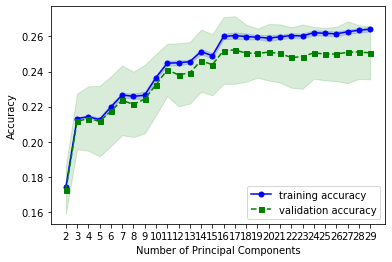

Guassian NB
----------------


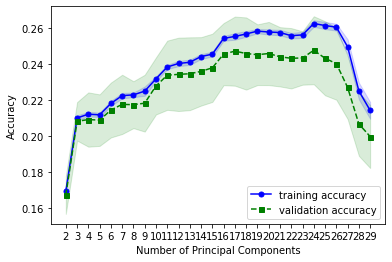

K Neighbors
----------------


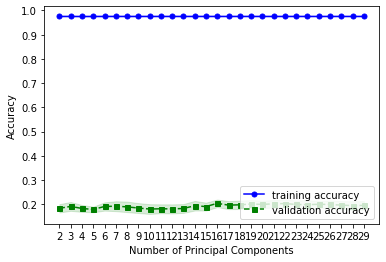

Random Forest
----------------


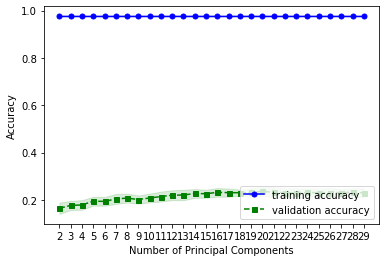

Ada Boost
----------------


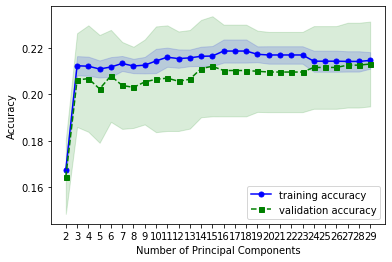

CPU times: user 17.4 s, sys: 5.09 s, total: 22.5 s
Wall time: 3h 47min 28s


In [50]:
%%time

pipelines = [lscv, gnb, knn, rfc, boost]

# Dictionary of pipelines and classifier types
pipe_dict = {0: 'Linear SVC', 1: 'Guassian NB', 2: 'K Neighbors', 3: 'Random Forest', 4: 'Ada Boost'}
    
for i, pipeline in enumerate(pipelines):
    
    print(pipe_dict[i])
    print("----------------")

    param_range = range(2,30)

    train_scores, test_scores = validation_curve(
                                                estimator=pipeline, X=X_train, y=y_train, cv=20,
                                                param_name='pca__n_components', param_range=param_range , n_jobs=-1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    
    plt.plot(param_range, test_mean, color='green', marker='s', markersize=5, linestyle='--', label='validation accuracy')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Accuracy')
    plt.xticks(range(2,30))
    plt.legend(loc='lower right')
    #plt.ylim(0.8, 1.0)
    plt.savefig("./output/pca_accuracy/"+pipe_dict[i].lower().replace(" ", "_")+".pdf", bbox_inches="tight")
    plt.show()



Running these plots took almost 4 hours!

How can I tune PCA to give me the best results from the classifiers? Here are some of my thoughts on the question. I'll choose the n components value that gives the highest point along the green line, indicating the highest validation accuracy, from the plots. The best PCA n components setting for classifiers are:
    
* Linear SVC: 24
* Guassian NB: 24
* K Neighbors: 27
* Random Forest: 16
* Ada Boost: 29

This is the first time I've been able to provide LSVC pipe with hyperparameter tuning. It appears that I can get LSVC and GNB to outperform the Ensemble methods at over 0.26 accuracy.

---

In [51]:
lscv = Pipeline([
    ('pca', PCA(n_components=24)),
    ('scl', StandardScaler()),
    ('clf', LinearSVC())
    ])

In [52]:
gnb = Pipeline([
    ('pca', PCA(n_components=24)),
    ('scl', StandardScaler()),
    ('clf', GaussianNB(var_smoothing=1.0))
    ])

In [53]:
knn = Pipeline([
    ('pca', PCA(n_components=27)),
    ('scl', StandardScaler()),
    ('clf', KNeighborsClassifier(weights='distance', n_neighbors=17, metric='manhattan'))
    ])

In [54]:
rfc = Pipeline([
    ('pca', PCA(n_components=16)),
    ('scl', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators=800, max_features='sqrt'))
    ])

In [56]:
boost = Pipeline([
    ('pca', PCA(n_components=29)),
    ('scl', StandardScaler()),
    ('clf', AdaBoostClassifier(n_estimators=10))
    ])

---

### Final Run...

In [57]:
%%time

# Setting ignore warnings because warning is diplayed when a category is not predicted
warnings.filterwarnings('ignore')

for i, pipeline in enumerate(pipelines):
    
    print(pipe_dict[i])
    
    y_pred = cross_val_predict(pipeline, X=X_train, y=y_train, cv=20)
    
    print("--- Accuracy ---")
    print(f"Test accuracy is {accuracy_score(y_train, y_pred):.8%}")
    print("\n")
    
    # Classification Report
    print("--- Classification Report ---")
    print(classification_report(y_train, y_pred))
    print("\n")
    
    # Confusion Matrix
    print("--- Confusion Matrix ---")
    cm = confusion_matrix(y_train,y_pred)
    print(cm)
    print("\n")

Linear SVC
--- Accuracy ---
Test accuracy is 24.90105541%


--- Classification Report ---
              precision    recall  f1-score   support

          10       0.15      0.02      0.04       241
          11       0.26      0.05      0.09       288
          12       0.08      0.01      0.01       150
          13       0.00      0.00      0.00        82
          14       0.15      0.17      0.16       391
          20       0.23      0.72      0.35       513
          21       0.08      0.00      0.01       236
          22       0.06      0.00      0.01       221
          23       0.00      0.00      0.00       271
          24       0.12      0.06      0.08       427
          30       0.12      0.01      0.02       361
          31       0.38      0.66      0.49       531
          32       0.00      0.00      0.00       239
          33       0.21      0.49      0.29       556
          34       0.16      0.02      0.04       298
          40       0.00      0.00      0.00  

--- Accuracy ---
Test accuracy is 23.44986807%


--- Classification Report ---
              precision    recall  f1-score   support

          10       0.12      0.07      0.09       241
          11       0.27      0.14      0.18       288
          12       0.14      0.04      0.06       150
          13       0.00      0.00      0.00        82
          14       0.12      0.12      0.12       391
          20       0.23      0.53      0.32       513
          21       0.13      0.03      0.05       236
          22       0.10      0.03      0.05       221
          23       0.05      0.02      0.03       271
          24       0.11      0.10      0.11       427
          30       0.12      0.09      0.10       361
          31       0.43      0.68      0.53       531
          32       0.10      0.05      0.07       239
          33       0.21      0.38      0.27       556
          34       0.12      0.07      0.09       298
          40       0.10      0.02      0.04       141
  

| Classifier    | Accuracy 1    | Accuracy 2  | Accuaracy 3  | Accuracy 4  | Accuracy 5  | Accuracy 6  | 
| ------------- |:-------------:| -----------:|:------------:|:------------|:------------|:------------|
| Linear SVC    | 0.1519         | 0.257        |-             |-            |0.25198291|0.2490105541|
| Guassian NB   | 0.0819          | 0.732        |0.13479573853553464            |0.20083436341161928           |0.20002334|0.1838720317|
| K Neighbors   | 0.137          | 0.1486       |0.21493715502576216            |0.21493715502576216           |0.20746211|0.1995382586|
| Random Forest | 0.1318         | 0.185        |0.22260766867786902           |0.22508138638338493           |0.22212958|0.2344986807|
| Ada Boost     | 0.167          | 0.1516       |0.25154389357353535            |0.25154389357353535           |0.25082671|0.2130606860|

This script took about 20 minutes to run.

With a modest increase of just under 1%, Random Forest was the only classifier that benefited from the PCA step. As a result of this step, the accuracy of all other classifiers decreased.  Ada Boost had quite deterioration in performance.

I've noticed that the classifiers didn't achieve the accuracy read off the green lines in the previous plots. This, I suppose, is due to the green bands around the green lines indicating variation in accuracy. The accuracy of the algorithm produces different accuracies that are aggregated after 20 iterations of cross validation. If the bands are large, the standard deviation is also wide.  It would be better to read of high values with compressed bands from the validation curves.

Surprisingly, before any hypertuning, the Linear SVC always has the highest accuracy. When Multiclassifier was first dropped, it had an accuracy of 25.7 percent. It was complaining about not being able to converge; this can be changed by increasing the cross validation's cv value (which I increased to 20).

**Observations**

~~Gaussian NB started out with an accuracy of 0.819! This was without a doubt the best. It began to decline rapidly after that initial sprint, finally reaching 0.18. Gaussian NB, in my opinion, is not appropriate for this type of dataset. The algorithm is a Naive Bayes variant that uses a Gaussian normal distribution and can handle continuous data. I don't think the dataset I provided is correct.  But it is interesting that it scored so high in the first run.~~ 
* This was a mistake caused by manually entering the numbers. It was crucial to understand the importance of being vigilant when copying these numbers down.

If we disregard GNN, Linear SVC was the most accurate classifier, with an accuracy of 0.257 with limited hyperparameter tuning. With more tuning, the algorithm began to do worse.

After some hyperparameter tuning, Ada Boost, an ensemble process, came in with an accuracy of about 0.251. PCA does not seem to have helped this algorithm.

The next best performer seemed to be Random Forest. It had the best accuracy of 0.231. Random Forest seems to be fairly stable, and it appears that hyperparameter tuning has improved the majority of the times there have been tweaks.

KNN was a strong performer before hyperparameters and PCA were added, at which point it began to regress. It had the highest accuracy of 0.214.

**Note**

~~While I find it intriguing that Gaussian NB achieved such a high score in the initial run, I remain skeptical of the result given how the other classifiers performed. I'd have to investigate deeper to see whether it's true or not.~~

* I reran the notebook and found my mistake.

---

## The Combined Target Column

In the following section, I examine and comment on my decision to merge my two targets into a single column for the classifiers to use.

In [58]:
y_pred

array(['31', '14', '33', ..., '43', '20', '20'], dtype=object)

In [59]:
(unique, counts) = np.unique(y_pred, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[['10' 24]
 ['11' 186]
 ['12' 16]
 ['14' 820]
 ['20' 1675]
 ['21' 115]
 ['24' 17]
 ['30' 65]
 ['31' 868]
 ['33' 1513]
 ['34' 4]
 ['41' 349]
 ['42' 6]
 ['43' 406]]


The algorithms appears to have treated the combined target column as a string (dtype=object) field. When I examine the set of values in this column, they do not form a continuous numeric integer or float set. The integers are divided into the following "reversible" categorical labels: 10-14, 20-24, 30-34, and 40-44.

Since this is just a test sample, some of those categories are absent in this subset. Initially, the missing numbers of 10, 22, 34, 40, and 42 had low counts. As a result, they will either not occur in the sample or they have a lower chance of being in the set.

Orginal Set

* 33    920
* 31    905
* 20    831
* 43    788
* 24    747
* 14    651
* 30    600
* 41    572
* **34    473**
* 23    470
* 11    462
* 21    400
* **10    398**
* 32    393
* **22    369**
* 44    292
* 12    258
* **40    256**
* **42    162**
* 13    161

This, I believe, proves that merging the targets into a single field was a valid method of handling them. In addition, any of these numbers could be given a term. We could come up with a label for each value in the target column since the numerical value in this column is a combination of Major Occupation and Education Attainment, and both of these have values associated with their numbers.  As a consequence, we will be able to come up with useful categorical labels for human interpretation that will give us more information about the dataset. We might, for example, assign words to all of these numbers.

So from these categories:

Education Attainment:
* Speciality
* College
* Some_College
* School

Major Occupation:
* Education
* Other
* Professional
* Computer
* Management

We could derive:
* Speciality-Education
* Speciality-Management
* School-Management

This will enable us to extract additional information from the data collection, such as the likelihood of a specialist-trained individual advancing to a management position or a school trained person advancing to a management position. We may also be able to analyze some of the conditions in which this happens, such as a high degree of technological proficiency or an adopter mentality, given the context provided by the rest of the dataset.  As a result, I believe that combining targets is a good way to handle this data.

---

## Conclusion

This classification exercise, I believe, has taught me these essential lessons:
    
* Tweaking hyperparameters does not always result in better performance; in fact, it can reduce accuracy.
* Simpler algorithms can surprise you and outperform more complex ensemble classifiers.
* The algorithms are a bit of a black box in that you don't really know what they've done, which necessitates some investigation.
* Some of these algorithms can take a long time to complete.
* When copying down the numbers, one must be cautious.